In [3]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex 
%matplotlib inline
import matplotlib.pyplot as plt

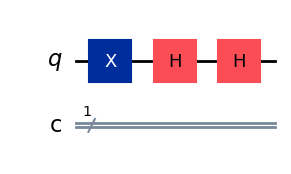

In [4]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
circuit.h(0)
circuit.draw(output='mpl')
plt.show()

In [5]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

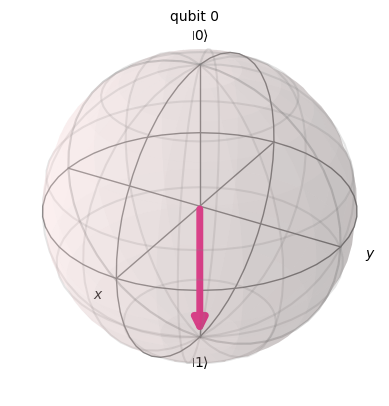

In [6]:
plot_bloch_multivector(statevector)
plt.show()

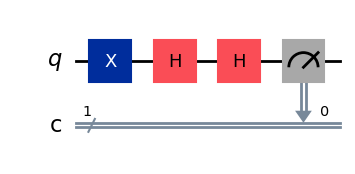

In [7]:
circuit.measure(0, 0)
circuit.draw(output='mpl')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

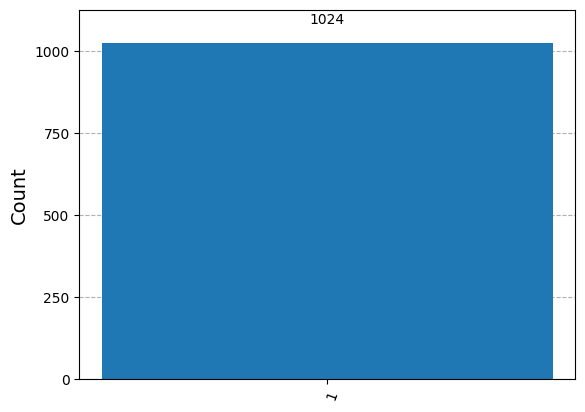

In [8]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
plot_histogram(result.get_counts())
plt.show